In [1]:
import mga
import numpy as np
import matplotlib.pyplot as plt
from problems import ChankongHaimes
from problems import BinhKorn
from evaluator import NonDominatedSortEvaluator
from evaluator import WeightBasedEvaluator

In [2]:
problem = ChankongHaimes()
evaluator = WeightBasedEvaluator(problem)
random_restarts = 500
MGA = mga.MicroGeneticAlgorithm(
    problem,
    evaluator=evaluator,
    population_size=10,
    agents_to_keep=10,
    agents_to_shuffle=9,
    random_restarts=random_restarts,
    max_iterations=1000,
    iteration_tolerance=20,
    num_bits=16,
    random_seed=42,
)
MGA.run_iterations()

Random restart/iterations 0 21 done                     best fitness: 79.25935440468592                     Weights: [0.81828729 0.18171271]
Random restart/iterations 1 21 done                     best fitness: 61.122856342455314                     Weights: [0.65761289 0.34238711]
Random restart/iterations 2 20 done                     best fitness: inf                     Weights: [0.78961814 0.21038186]
Random restart/iterations 3 21 done                     best fitness: -77.46093221061189                     Weights: [0.08175903 0.91824097]
Random restart/iterations 4 21 done                     best fitness: 9.172864852731768                     Weights: [0.86989636 0.13010364]
Random restart/iterations 5 21 done                     best fitness: 197.8008837875109                     Weights: [0.92524832 0.07475168]
Random restart/iterations 6 21 done                     best fitness: 39.62081951835191                     Weights: [0.08238105 0.91761895]
Random restart/iterations

In [3]:
f1 = np.zeros((random_restarts))
f2 = np.zeros((random_restarts))
best_agents = MGA.best_agents[MGA.best_fitness != np.inf]
for i in range(len(best_agents)):
    f1[i] = problem.f_1(best_agents[i])
    f2[i] = problem.f_2(best_agents[i])

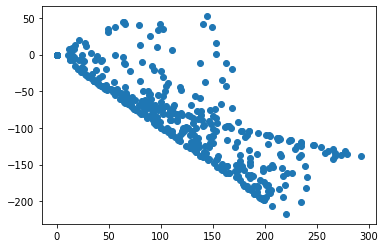

In [4]:
plt.scatter(f1,f2)

In [5]:
import benchmark_chankong_haimes as bm
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

# Predefined Problems, Algorithms and Terminations
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  2.305424903 |       8 |            - |            -
    2 |     200 |  0.00000E+00 |  0.250132126 |      16 |  0.024880199 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |      32 |  0.026203941 |            f
    4 |     400 |  0.00000E+00 |  0.00000E+00 |      40 |  0.027512832 |        ideal
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      53 |  0.064919532 |        ideal
    6 |     600 |  0.00000E+00 |  0.00000E+00 |      65 |  0.013277327 |        ideal
    7 |     700 |  0.00000E+00 |  0.00000E+00 |      92 |  0.019554246 |        ideal
    8 |     800 |  0.00000E+00 |  0.00000E+00 |     100 |  0.003012999 |            f
    9 |     900 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002666277 |            f
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002250196 |            f
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

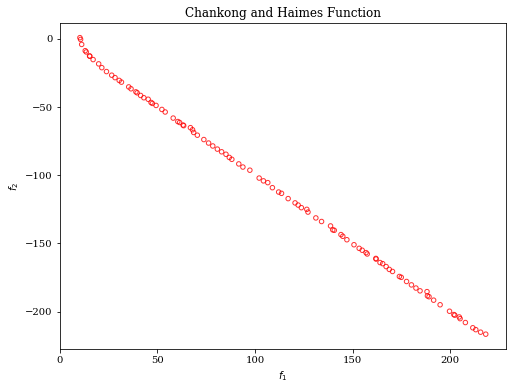

In [6]:
problem = bm.ChankongHaimes()
algorithm = NSGA2()
termination = MultiObjectiveDefaultTermination()
result = minimize(
    problem,
    algorithm,
    termination,
    pf=True,
    seed=1,
    save_history=True,
    verbose=True,
)
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()

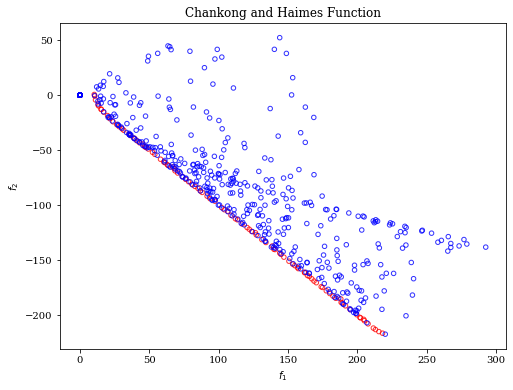

In [7]:
f = np.vstack((f1, f2)).T
#f = f[:100][:]
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.add(f, facecolor="none", edgecolor="blue", alpha=0.8, s=20)
plot.show()